<a href="https://colab.research.google.com/github/fomen2001/j-apprends-les-bases-de-la-data-science/blob/main/Copy_of_Evaluation_IAS_M1_DS_1_(24_25)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📊 **Projet de Data Science — Évaluation de crédit**  : IAS-M1-DS-1 (24-25)
**Contexte :**  
Vous travaillez pour une banque qui souhaite mieux prédire le risque de crédit de ses clients. On vous fournit un extrait du dataset "German Credit", mais vous ne devez travailler **que sur les variables quantitatives**.

### 🎯 **Objectif du projet**
- Préparer les données quantitatives
- Explorer les distributions et corrélations
- Implémenter un premier modèle de classification
- Évaluer ses performances et discuter les résultats

### 📝 **Travail demandé**

#### Partie 1 — Exploration des données
1. Charger les données `german_credit.csv` et afficher les 5 premières lignes.
2. Identifier et isoler uniquement les **variables quantitatives**.
3. Vérifier la présence de valeurs manquantes, décrire les distributions.
4. Tracer la matrice de corrélation.
5. Visualiser les variables principales par rapport à la **variable cible** (`credit_risk` ou similaire : 1 = bon crédit, 0 = mauvais crédit).

#### Partie 2 — Préparation des données
1. Standardiser les variables quantitatives (centrer-réduire).
2. Diviser les données en **jeu d'entraînement/test (80/20)**.
3. Vérifier le déséquilibre de la variable cible.

#### Partie 3 — Modélisation et évaluation
1. Entraîner un modèle de **régression logistique**.
2. Calculer la **précision**, **rappel**, **f1-score**, **matrice de confusion**, **courbe ROC**.
3. Faire une interprétation des résultats : quelles variables semblent influentes ?
4. Proposer une amélioration (normalisation différente, autre modèle ?).

### 💾 **Variables quantitatives typiques du German Credit**
En fonction du fichier, ce sont généralement :
- `duration` (durée du crédit)
- `credit_amount` (montant)
- `age` (âge du client)
- `installment_rate` (taux de remboursement)
- `existing_credits` (nombre de crédits existants)
- `num_dependents` (personnes à charge)
- etc.

Partie 1 — Exploration des données
Charger les données german_credit.csv et afficher les 5 premières lignes.
Identifier et isoler uniquement les variables quantitatives.
Vérifier la présence de valeurs manquantes, décrire les distributions.
Tracer la matrice de corrélation.
Visualiser les variables principales par rapport à la variable cible (credit_risk ou similaire : 1 = bon crédit, 0 = mauvais crédit).

In [75]:
#Chargement des bibliotheque
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [3]:
#chargement des donnees
data = pd.read_csv('german_credit_quantitative.csv')

In [4]:
#afficher les 5 premieres lignes
data.head(5)

,duration,credit_amount,age,installment_rate,existing_credits,num_dependents,credit_risk
0,57,2851,28,2,1,2,1
1,20,6446,63,2,1,1,1
2,66,4779,67,2,2,1,1
3,26,3385,38,2,2,1,1
4,29,5105,38,2,1,1,1


In [19]:
# On identifie toutes les colonnes numériques
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Nom de la colonne catégorielle binaire
col_binaire = "credit_risk"

# On isole les variables quantitatives en excluant la colonne binaire
quant_vars = data[numeric_cols].drop(columns=[col_binaire])

print("Variables quantitatives identifiées :")
print(quant_vars.columns)

Variables quantitatives identifiées :
Index(['duration', 'credit_amount', 'age', 'installment_rate',
       'existing_credits', 'num_dependents'],
      dtype='object')


In [20]:
quant_vars

,duration,credit_amount,age,installment_rate,existing_credits,num_dependents
0,57,2851,28,2,1,2
1,20,6446,63,2,1,1
2,66,4779,67,2,2,1
3,26,3385,38,2,2,1
4,29,5105,38,2,1,1
...,...,...,...,...,...,...
995,62,1090,42,4,3,1
996,36,4857,35,3,3,2
997,11,3172,36,4,3,1
998,45,2162,40,4,3,1


In [21]:
# 2. Vérifier les valeurs manquantes
print("Valeurs manquantes par variable :")
print(quant_vars.isnull().sum())

Valeurs manquantes par variable :
duration            0
credit_amount       0
age                 0
installment_rate    0
existing_credits    0
num_dependents      0
dtype: int64


In [22]:
# 3. Statistiques descriptives
print("\nStatistiques descriptives :")
print(quant_vars.describe())


Statistiques descriptives :
          duration  credit_amount         age  installment_rate  \
count  1000.000000    1000.000000  1000.00000       1000.000000   
mean     38.163000    3090.013000    46.54100          2.439000   
std      19.443778    1487.131666    16.27677          1.121399   
min       6.000000     250.000000    18.00000          1.000000   
25%      21.000000    2065.750000    33.00000          1.000000   
50%      38.000000    3061.500000    47.00000          2.000000   
75%      56.000000    4089.750000    61.00000          3.000000   
max      71.000000    7751.000000    74.00000          4.000000   

       existing_credits  num_dependents  
count       1000.000000     1000.000000  
mean           2.042000        1.509000  
std            0.814186        0.500169  
min            1.000000        1.000000  
25%            1.000000        1.000000  
50%            2.000000        2.000000  
75%            3.000000        2.000000  
max            3.000000        

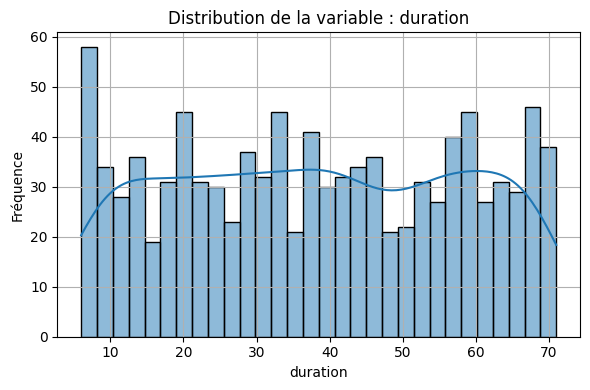

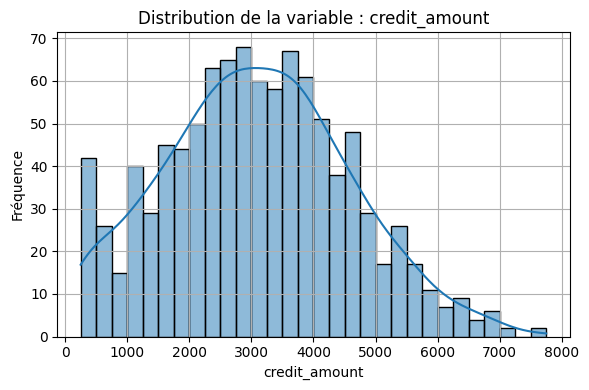

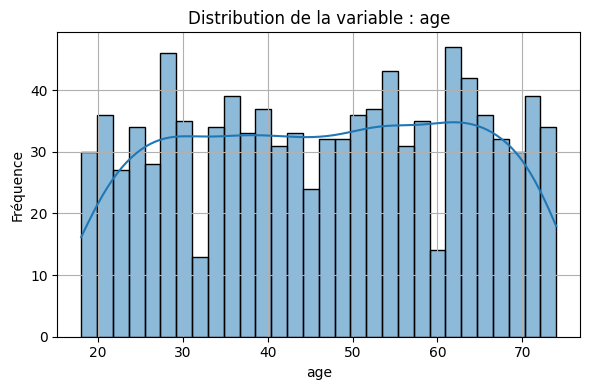

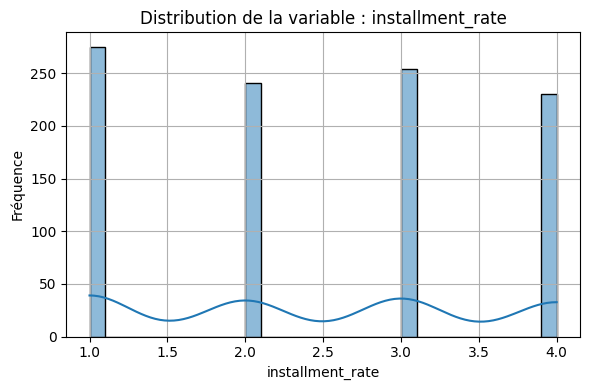

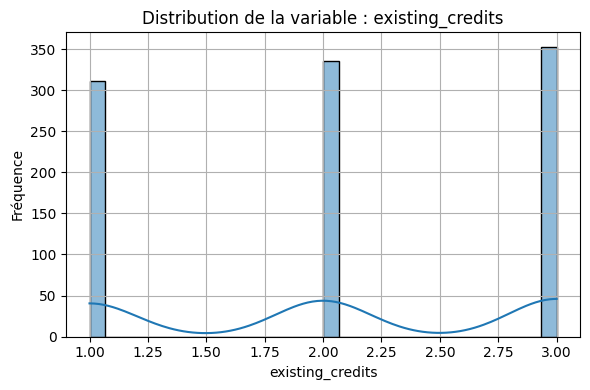

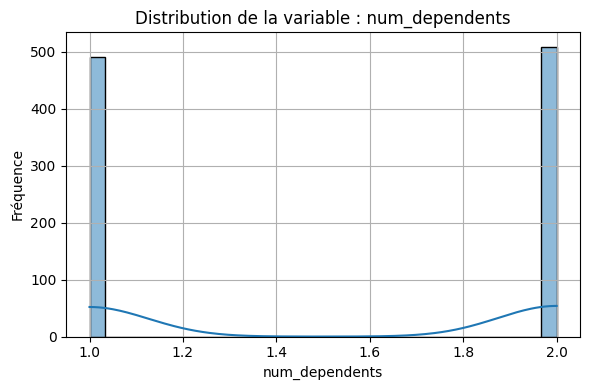

In [25]:
# 4. Visualisation des distributions
for col in quant_vars.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(quant_vars[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution de la variable : {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [37]:
#matrice de correlation
corr = data.corr()
corr

,duration,credit_amount,age,installment_rate,existing_credits,num_dependents,credit_risk
duration,1.000000,-0.044844,0.037461,-0.052774,0.025934,-0.005761,0.010008
credit_amount,-0.044844,1.000000,0.003407,0.024124,-0.009003,0.036518,0.047611
age,0.037461,0.003407,1.000000,-0.003153,0.005157,0.008439,-0.021514
installment_rate,-0.052774,0.024124,-0.003153,1.000000,-0.021311,0.008118,-0.020580
existing_credits,0.025934,-0.009003,0.005157,-0.021311,1.000000,0.028568,0.019126
num_dependents,-0.005761,0.036518,0.008439,0.008118,0.028568,1.000000,0.053118
credit_risk,0.010008,0.047611,-0.021514,-0.020580,0.019126,0.053118,1.000000


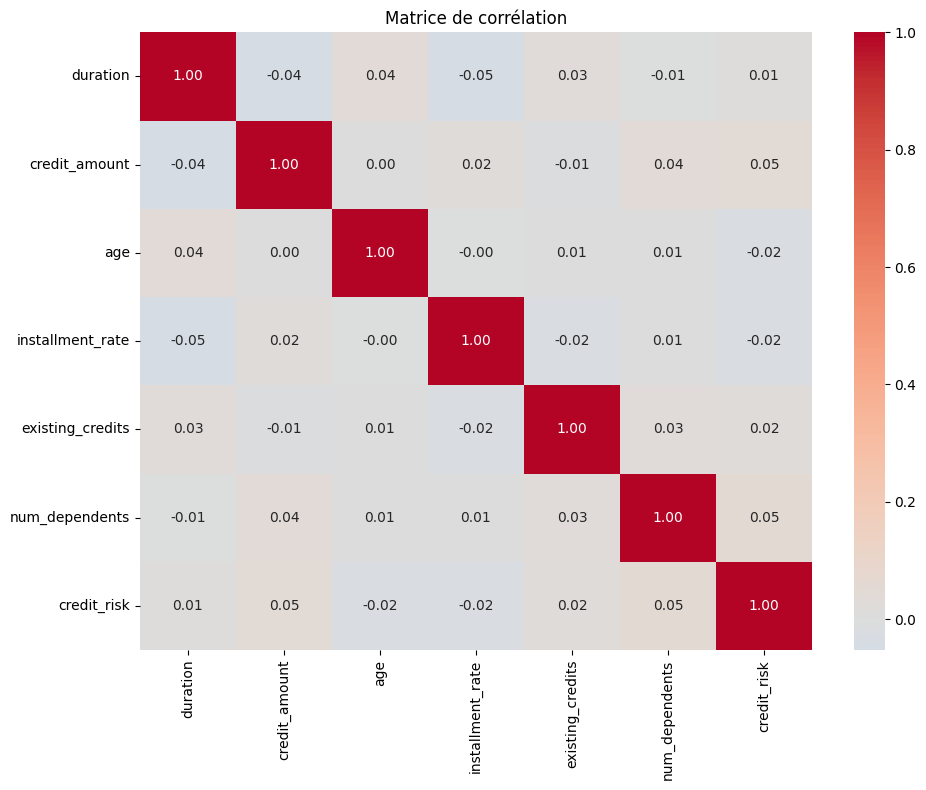

In [38]:
#graphique matrice de correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

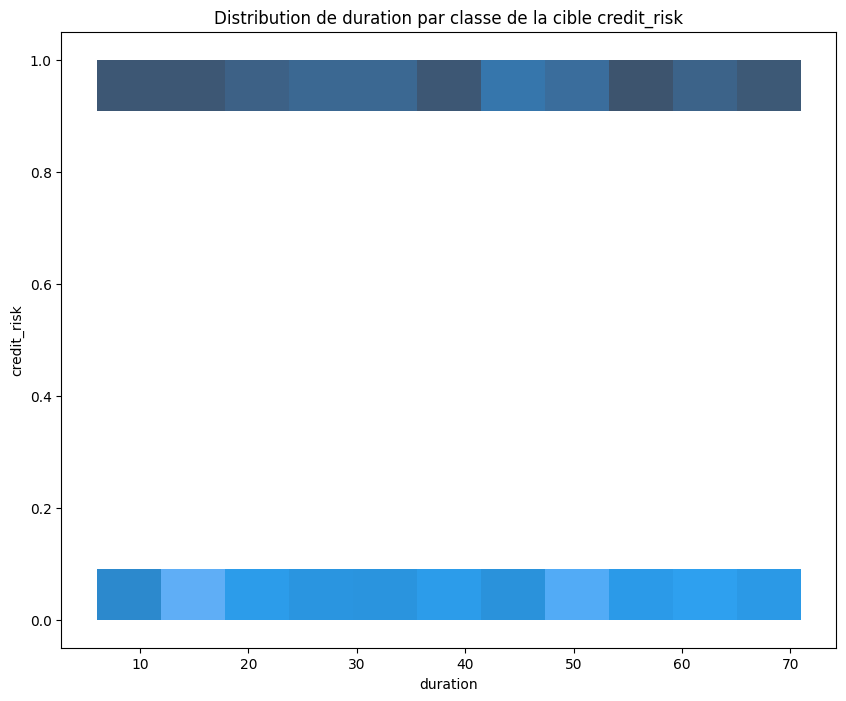

In [105]:
#Visualiser les variables principales par rapport à la variable cible (credit_risk ou similaire : 1 = bon crédit, 0 = mauvais crédit).
plt.figure(figsize=(10, 8))
sns.histplot(x=('duration'), y='credit_risk', data=data)
plt.title('Distribution de duration par classe de la cible credit_risk')
plt.show()

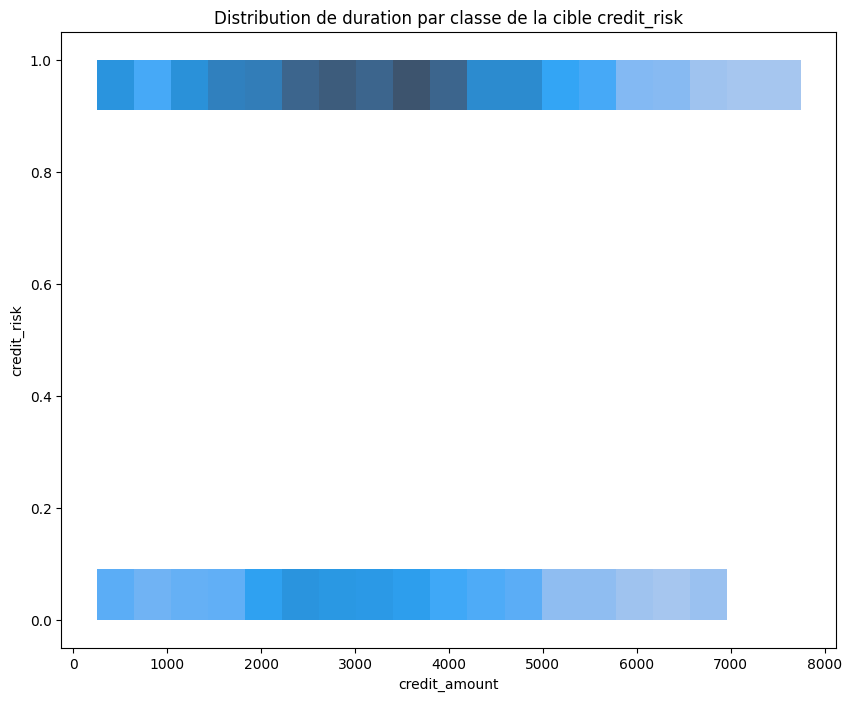

In [106]:
#Visualiser les variables principales par rapport à la variable cible (credit_risk ou similaire : 1 = bon crédit, 0 = mauvais crédit).
plt.figure(figsize=(10, 8))
sns.histplot(x=('credit_amount'), y='credit_risk', data=data)
plt.title('Distribution de duration par classe de la cible credit_risk')
plt.show()

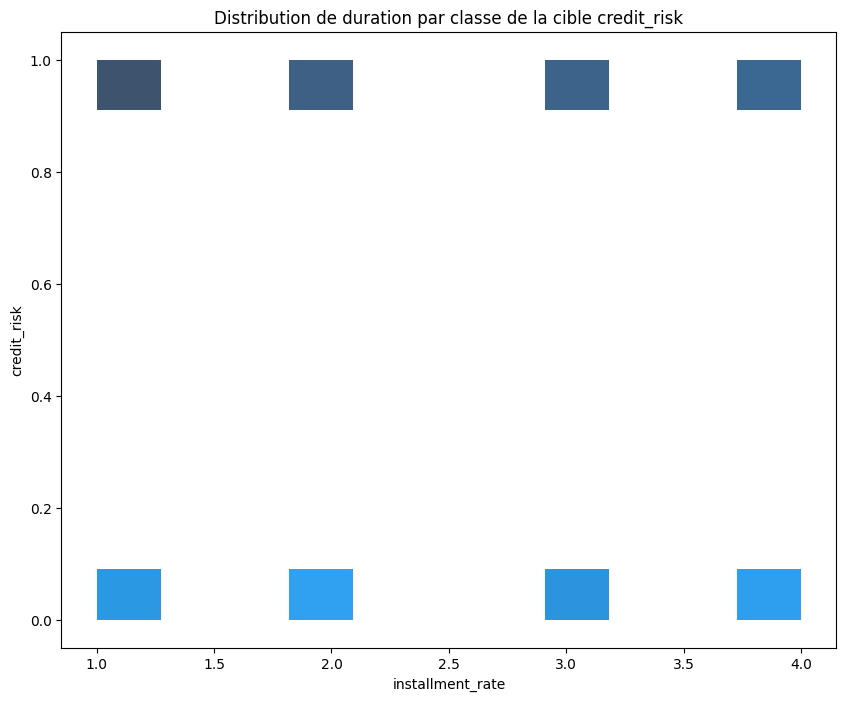

In [110]:
#Visualiser les variables principales par rapport à la variable cible (credit_risk ou similaire : 1 = bon crédit, 0 = mauvais crédit).
plt.figure(figsize=(10, 8))
sns.histplot(x=('installment_rate'), y='credit_risk', data=data)
plt.title('Distribution de duration par classe de la cible credit_risk')
plt.show()

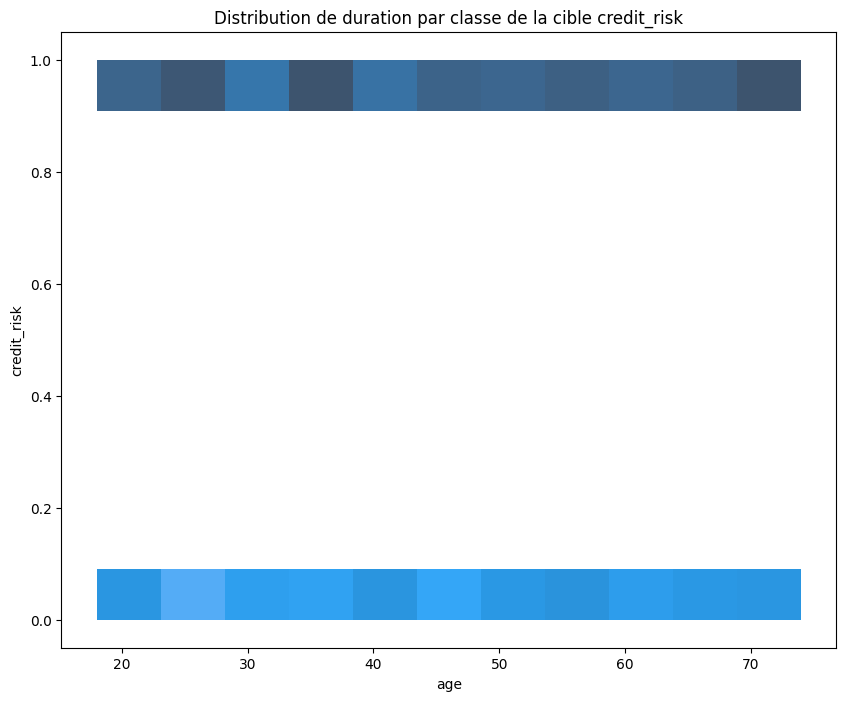

In [111]:
#Visualiser les variables principales par rapport à la variable cible (credit_risk ou similaire : 1 = bon crédit, 0 = mauvais crédit).
plt.figure(figsize=(10, 8))
sns.histplot(x=('age'), y='credit_risk', data=data)
plt.title('Distribution de duration par classe de la cible credit_risk')
plt.show()

Partie 2 — Préparation des données
Standardiser les variables quantitatives (centrer-réduire).
Diviser les données en jeu d'entraînement/test (80/20).
Vérifier le déséquilibre de la variable cible.

In [43]:
# 2. Création du scaler
scaler = StandardScaler()

# 3. Standardisation
quant_vars_scaled = scaler.fit_transform(quant_vars)

quant_vars_scaled


array([[ 0.96927798, -0.16080123, -1.13967802, -0.39167105, -1.28044617,
         0.98215912],
       [-0.93459659,  2.2578137 ,  1.01170167, -0.39167105, -1.28044617,
        -1.01816496],
       [ 1.4323826 ,  1.13630297,  1.25757363, -0.39167105, -0.05161107,
        -1.01816496],
       ...,
       [-1.39770121,  0.05515855, -0.6479341 ,  1.3927073 ,  1.17722402,
        -1.01816496],
       [ 0.35180515, -0.62434106, -0.40206213,  1.3927073 ,  1.17722402,
        -1.01816496],
       [-1.0889648 , -1.76872603,  1.56491359, -1.28386022,  1.17722402,
         0.98215912]])

In [55]:
X = quant_vars
X

,duration,credit_amount,age,installment_rate,existing_credits,num_dependents
0,57,2851,28,2,1,2
1,20,6446,63,2,1,1
2,66,4779,67,2,2,1
3,26,3385,38,2,2,1
4,29,5105,38,2,1,1
...,...,...,...,...,...,...
995,62,1090,42,4,3,1
996,36,4857,35,3,3,2
997,11,3172,36,4,3,1
998,45,2162,40,4,3,1


In [57]:
y = data['credit_risk']
y

,credit_risk
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,0
997,0
998,1


In [58]:
#division des donnees en jeu d'entrainements
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#verifier le desequilibre de la variable cible
y_train.value_counts(normalize=True)

,proportion
credit_risk,
1,0.6925
0,0.3075


Partie 3 — Modélisation et évaluation
Entraîner un modèle de régression logistique.
Calculer la précision, rappel, f1-score, matrice de confusion, courbe ROC.
Faire une interprétation des résultats : quelles variables semblent influentes ?
Proposer une amélioration (normalisation différente, autre modèle ?).

In [65]:
# 4. Entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
# 5. Prédictions
y_pred = model.predict(X_test)

In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [70]:
# 6. Évaluation
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Matrice de confusion :
[[  0  69]
 [  0 131]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.66      1.00      0.79       131

    accuracy                           0.66       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.43      0.66      0.52       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


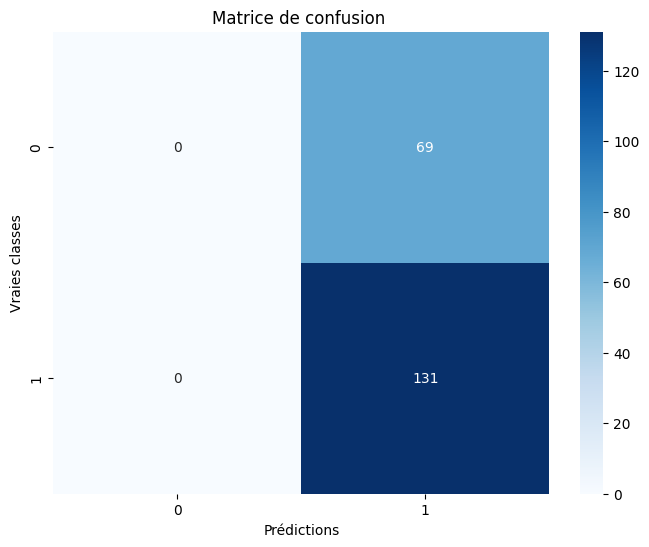

In [84]:
# Affichage de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de confusion ")
plt.show()

In [85]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")


Précision du modèle : 0.66


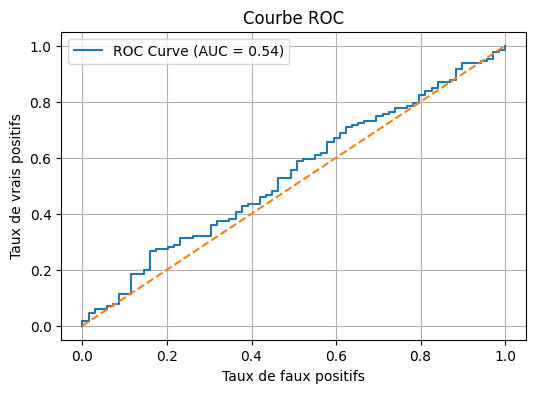

In [76]:
# Courbe ROC
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()

**Analyse**:
69 vrais 0 ont été mal classés en 1 → aucun 0 correctement prédit.

131 vrais 1 ont été correctement classés.
Accuracy (précision globale) : 0.66 → 66% des prédictions sont correctes.

Macro avg (moyenne simple entre classes) : très bas (surtout à cause de la classe 0)

Weighted avg (moyenne pondérée par le nombre de cas) : un peu mieux (0.52 F1-score)
Conclusion:
Le modèle est fortement biaisé vers la classe 1.

Il ne reconnaît jamais la classe 0 → déséquilibre des classes probable (69 vs 131).

Il fait un erreur de type I systématique sur les classes 0.


**NAIVE BAYES**

In [95]:
from sklearn.naive_bayes import GaussianNB
# Création et entraînement du modèle Naïve Bayes Gaussien
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [96]:
# Prédictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [97]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[  0,  69],
       [  0, 131]])

In [99]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.66

Rapport de classification :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.66      1.00      0.79       131

    accuracy                           0.66       200
   macro avg       0.33      0.50      0.40       200
weighted avg       0.43      0.66      0.52       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de confusion du modèle Naïve Bayes")
plt.show()

**AUTRE MODELE: KNN**

In [112]:
from sklearn.neighbors import KNeighborsClassifier
# Define the k-NN classifier
k = 19  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [113]:
knn

KNeighborsClassifier(n_neighbors=19)

In [114]:
# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Accuracy: 0.65
Confusion Matrix:
[[  2  67]
 [  3 128]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.40      0.03      0.05        69
           1       0.66      0.98      0.79       131

    accuracy                           0.65       200
   macro avg       0.53      0.50      0.42       200
weighted avg       0.57      0.65      0.53       200



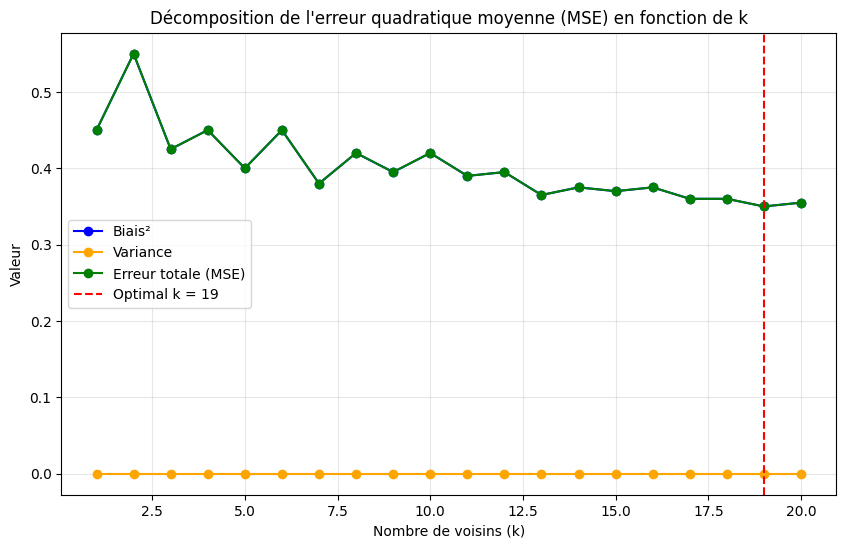

In [115]:
# Define the range of k values
k_values = range(1, 21)

# Initialize arrays to store bias², variance, and total error
bias_squared = []
variance = []
total_error = []

# Loop over k values to compute bias², variance, and total MSE
for k in k_values:
    predictions = []
    for _ in range(50):  # Simulate multiple training samples
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        predictions.append(y_pred)

    predictions = np.array(predictions)
    mean_prediction = np.mean(predictions, axis=0)

    # Calculate Bias², Variance, and Total MSE
    bias_squared_val = np.mean((y_test - mean_prediction) ** 2)
    variance_val = np.mean(np.var(predictions, axis=0))
    mse_val = bias_squared_val + variance_val

    bias_squared.append(bias_squared_val)
    variance.append(variance_val)
    total_error.append(mse_val)

# Find the optimal k (minimum total error)
optimal_k = k_values[np.argmin(total_error)]

# Plot the results with a vertical bar at the optimal k
plt.figure(figsize=(10, 6))
plt.plot(k_values, bias_squared, label="Biais²", marker="o", color="blue")
plt.plot(k_values, variance, label="Variance", marker="o", color="orange")
plt.plot(k_values, total_error, label="Erreur totale (MSE)", marker="o", color="green")
plt.axvline(optimal_k, color="red", linestyle="--", label=f"Optimal k = {optimal_k}")

plt.title("Décomposition de l'erreur quadratique moyenne (MSE) en fonction de k")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Valeur")
plt.legend()
plt.grid(alpha=0.3)
plt.show()